# Task 1: Data Summery and Initial Observations

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample_data.csv')

print(df.head())

df.describe()

# percentage of churn

churn_rate = round(df['churn'].sum() / len(df) *100, 2)
print(f"Churn Rate:\n{churn_rate}")

# everything is balanced

df.notna().sum()



   customer_id  age  annual_income  spending_score  membership_years  \
0            1   56          23343              17                 2   
1            2   69          33500              13                 4   
2            3   46          73222              84                 3   
3            4   32          49375              25                 2   
4            5   60          29662              68                 9   

   purchased_products  product_rating  churn category  
0                  15             3.0      1        A  
1                  16             3.2      1        C  
2                   5             4.8      1        D  
3                  27             4.4      1        A  
4                  20             4.7      1        A  
Churn Rate:
52.4


customer_id           500
age                   500
annual_income         500
spending_score        500
membership_years      500
purchased_products    500
product_rating        500
churn                 500
category              500
dtype: int64

# Task 2: Advanced EDA with Visualizations

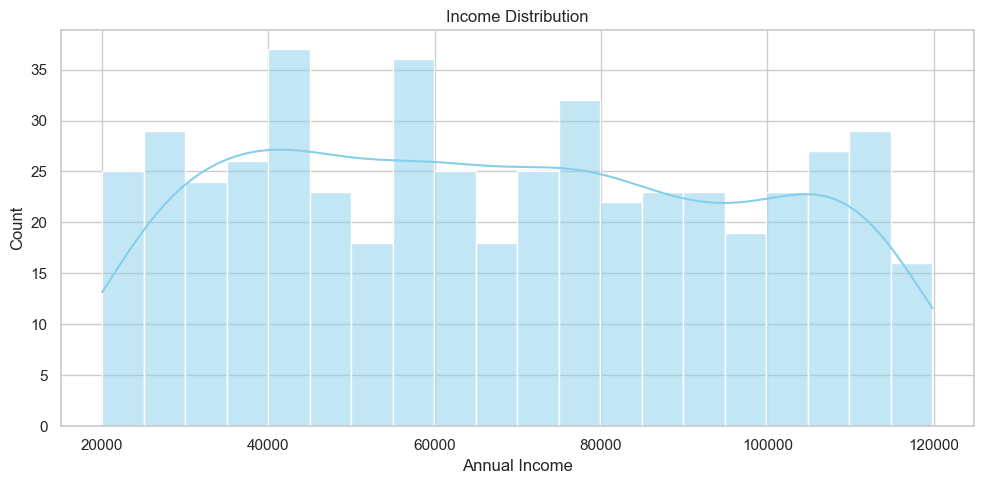

/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_93378/1137865232.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


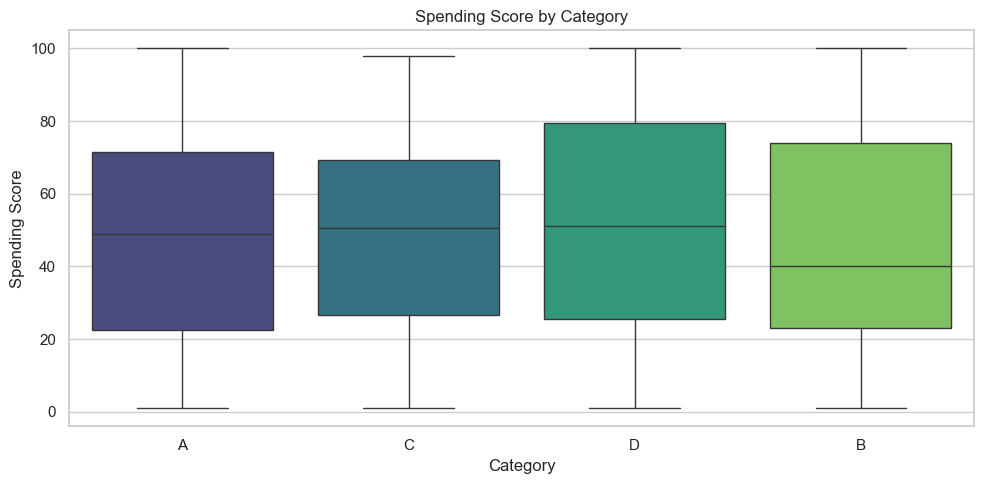

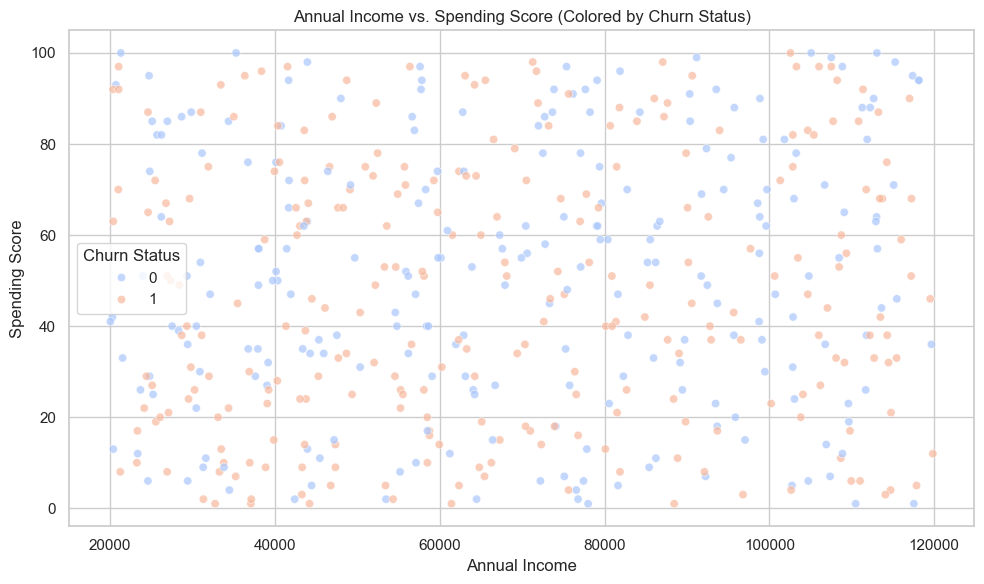

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x='annual_income',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.title("Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='category',
    y='spending_score',
    palette="viridis"
)
plt.title("Spending Score by Category")
plt.xlabel("Category")
plt.ylabel("Spending Score")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='annual_income',
    y='spending_score',
    hue='churn',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Annual Income vs. Spending Score (Colored by Churn Status)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Churn Status")
plt.tight_layout()
plt.show()


# Task 3: Creating custom metrics for customer value

In [16]:
df['customer_value_score'] = df['spending_score'] * df['membership_years']


top_10_customers = df.sort_values(by='customer_value_score', ascending=False).head(10)

print("Top 10 Highest-Value Customers:")
print(top_10_customers[['customer_id', 'spending_score', 'membership_years', 'customer_value_score']])


Top 10 Highest-Value Customers:
     customer_id  spending_score  membership_years  customer_value_score
197          198              97                14                  1358
202          203             100                13                  1300
240          241              97                13                  1261
217          218              95                13                  1235
192          193              86                14                  1204
156          157              97                12                  1164
73            74              97                12                  1164
37            38              95                12                  1140
352          353              94                12                  1128
341          342              93                12                  1116


# Task 4: implementing a Baseline model for churn prediction

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[['spending_score', 'annual_income']]
y = df['churn']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.52


# Task 5: comparing models with cross-validation

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


X = df[['age', 'annual_income', 'spending_score', 'membership_years']]
y = df['churn']


models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ]),
    
    "Decision Tree": Pipeline([
        ("model", DecisionTreeClassifier(random_state=42))
    ]),
    
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ])
}

results = {}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    results[model_name] = cv_scores.mean()
    print(f"{model_name} Mean Accuracy: {cv_scores.mean():.4f}")

best_model = max(results, key=results.get)
print("\nBest Model Based on 5-Fold CV:", best_model)


Logistic Regression Mean Accuracy: 0.4900
Decision Tree Mean Accuracy: 0.5120
K-Nearest Neighbors Mean Accuracy: 0.5060

Best Model Based on 5-Fold CV: Decision Tree
